# Data

#### Updating data

In [1]:
from utilities import *
from Guardian import *

ROOT_DIR = os.path.dirname(os.path.abspath("__file__"))
PARENT_DIR = os.path.dirname(ROOT_DIR)

source = "Guardian"

In [2]:
data = guardianScraper()

data.to_csv(PARENT_DIR + "/data/Guardian.csv", index=True)

-> CSV file found with 3175 articles! Latest article date: 2021-02-01
-> Checking articles from latest date onward...
-> Ukraine API Query |████████████████████████████████████████| (!) 3160 in 9:29.2 (5.55/s) ⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐| 1052 in 3:07 (5.6/s) |⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀| 1070 in 3:10 (5.6/s) |⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀⡀⠄⠂⠁⠈⠐⠠⢀| 1495 in 4:26 (5.6/s) 
-> Russia API Query |████████████████████████████████████████| (!) 85 in 1:03.7 (1.33/s) 
-> 26 new articles saved to Guardian.csv! Total articles: 3201


In [3]:
data.head(1)

,URL,Title,Text
Date,,,
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...


#### LDA topic identification

In [ ]:
doc_topic, topic_word, vocabulary = learn_topics(data, topicnum=30, vocabsize=10000, num_iter=2000) 

In [ ]:
topics = []
for i in range(len(data)):
    topics.append(doc_topic[i].argmax())

In [ ]:
for i in range(10):
    print(f"{data.iloc[i][1]} TOPIC: {doc_topic[i].argmax()}")

Nancy Pelosi’s Taiwan trip ‘not a good idea right now’, says Biden TOPIC: 8
Dining across the divide: ‘He supports a new Heathrow runway – we should invest in trains’ TOPIC: 1
Russia-Ukraine war at a glance: what we know on day 148 of the invasion TOPIC: 22
Woodside and Santos reap bumper profits as Ukraine war drives energy prices higher TOPIC: 19
EU imposes sanctions on Russian motorcycle club and pro-Putin actors TOPIC: 25
Russia may seek to occupy more territory in Ukraine, says foreign minister TOPIC: 22
‘They hunt us like stray cats’: pro-Russia separatists step up forced conscription as losses mount TOPIC: 4
EU adopts Ukrainian art exhibition left stranded in Denmark TOPIC: 10
UK inflation rise is worrying but Bank of England must not overreact TOPIC: 19
Erdoğan keeps Putin waiting in awkward moment ahead of Tehran talks TOPIC: 24


In [ ]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocabulary)[np.argsort(topic_dist)][:-8:-1]
    print("Topic {}: {}".format(i, " ".join(topic_words)))


Topic 0: the ukraine russian music film ukrainian world
Topic 1: it we people but like he don
Topic 2: nato russia ukraine us russian troops military
Topic 3: said the russian soldiers guardian they he
Topic 4: ukrainian ukraine said russian soldiers the war
Topic 5: refugees uk said people visa ukrainian ukrainians
Topic 6: ukraine weapons us military the forces russian
Topic 7: children she war family says said the
Topic 8: russia china said australia russian ukraine the
Topic 9: said uk british ukraine secretary we foreign
Topic 10: the war world soviet in ukraine history
Topic 11: russian russia said putin war moscow ukraine
Topic 12: media russian ukraine news the russia said
Topic 13: kyiv ukrainian ukraine city war people country
Topic 14: germany german scholz chancellor gas pipeline olaf
Topic 15: putin russia ukraine war the it west
Topic 16: ukraine people support help said ukrainian aid
Topic 17: it the but in time new this
Topic 18: johnson minister prime government party 

In [ ]:
save_topicmodel(doc_topic, topic_word, vocabulary, source)

('/Users/r2/Code/ukraine-media/results/GuardianTopicMixtures.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianTopics.txt',
 '/Users/r2/Code/ukraine-media/results/GuardianVocab.txt')

In [ ]:
period = 7
novelties, transiences, resonances = novelty_transience_resonance(doc_topic, period)

for index in range(0,period):
    transiences.insert(0, 0)
    transiences.append(0)
    novelties.insert(0, 0)
    novelties.append(0)
    resonances.insert(0, 0)
    resonances.append(0)

save_novel_trans_reson(novelties, transiences, resonances, source)

In [ ]:
ntr_data = data
ntr_data['Novelty'] = novelties
ntr_data['Transience'] = novelties
ntr_data['Resonance'] = resonances
ntr_data['Topic'] = topics

ntr_data.to_csv(PARENT_DIR + "/data/"+ source + "_ntr.csv")
ntr_data.head(5)

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...,0.0,0.0,0.0,8
2022-07-21,https://www.theguardian.com/lifeandstyle/2022/...,Dining across the divide: ‘He supports a new H...,"Jasper, 26, London Occupation Architect Vot...",0.0,0.0,0.0,1
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,Russia-Ukraine war at a glance: what we know o...,The Russian Nord Stream 1 gas pipeline has re...,0.0,0.0,0.0,22
2022-07-21,https://www.theguardian.com/business/2022/jul/...,Woodside and Santos reap bumper profits as Ukr...,High energy prices due to Russia’s invasion of...,0.0,0.0,0.0,19
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,EU imposes sanctions on Russian motorcycle clu...,"New EU sanctions hitting Russian gold, a major...",0.0,0.0,0.0,25


# Plots

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
ntr_data = pd.read_csv(PARENT_DIR + "/data/" + source + "_ntr.csv", parse_dates=['Date'], index_col= ['Date'])
ntr_data.head()
#print(len(ntr_data))

,URL,Title,Text,Novelty,Transience,Resonance,Topic
Date,,,,,,,
2022-07-21,https://www.theguardian.com/us-news/2022/jul/2...,Nancy Pelosi’s Taiwan trip ‘not a good idea ri...,Joe Biden has cautioned against the reported t...,0.0,0.0,0.0,8
2022-07-21,https://www.theguardian.com/lifeandstyle/2022/...,Dining across the divide: ‘He supports a new H...,"Jasper, 26, London Occupation Architect Vot...",0.0,0.0,0.0,1
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,Russia-Ukraine war at a glance: what we know o...,The Russian Nord Stream 1 gas pipeline has re...,0.0,0.0,0.0,22
2022-07-21,https://www.theguardian.com/business/2022/jul/...,Woodside and Santos reap bumper profits as Ukr...,High energy prices due to Russia’s invasion of...,0.0,0.0,0.0,19
2022-07-21,https://www.theguardian.com/world/2022/jul/21/...,EU imposes sanctions on Russian motorcycle clu...,"New EU sanctions hitting Russian gold, a major...",0.0,0.0,0.0,25


In [ ]:
davg = ntr_data.resample('D').mean()
davg.head()

,Novelty,Transience,Resonance,Topic
Date,,,,
2021-02-10,0.0,0.0,0.0,29.0
2021-02-11,NaN,NaN,NaN,NaN
2021-02-12,NaN,NaN,NaN,NaN
2021-02-13,NaN,NaN,NaN,NaN
2021-02-14,NaN,NaN,NaN,NaN


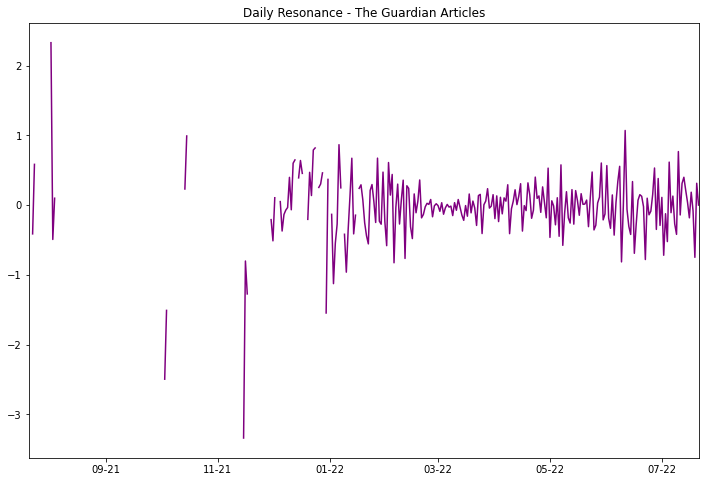

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

beginning = dt.date(2021, 7, 21)
end = dt.date.today()

ax.plot(davg.index.values,
       davg['Resonance'],
       color='purple',
       #linewidths=0
       )

ax.set(
       #xlabel="Date",
       #ylabel="Resonance",
       title="Daily Resonance - The Guardian Articles")

date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set_xbound(beginning, end)